## test request to rest web service
launch rest_web_service.py

In [1]:
# import

import tensorflow as tf
import matplotlib.pylab as plt
from PIL import Image
import base64
import numpy as np
import cv2
from io import BytesIO
import json
import requests
from imageio import imread
import time
from matplotlib import gridspec


In [2]:
image = Image.open("examples/image1.jpg")

width, height = image.size
resize_ratio = 1.0 * 513 / max(width, height)
target_size = (int(resize_ratio * width), int(resize_ratio * height))
resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
print(resized_image.width,resized_image.height)

buffered = BytesIO()
resized_image.save(buffered, format="JPEG")
# urlsafe_
img_bytes = base64.urlsafe_b64encode(buffered.getvalue()).decode('utf-8')


513 342


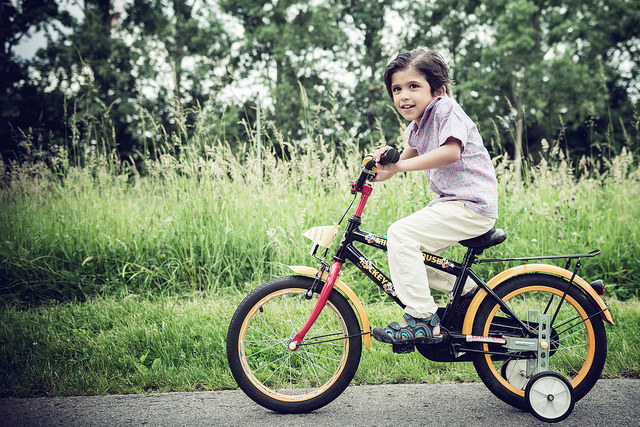

In [3]:
image

In [4]:
data = json.dumps({"inputs": img_bytes})
# print(data)

In [5]:
start = time.time()
# http://ipaddress/getStyleInfo
# http://ipaddress/initStyleModel
# http://ipaddress/LIYS
# http://ipaddress/segmentation
# http://ipaddress/styleTransfer
json_response = requests.post("http://0.0.0.0:5000/LIYS", json={"inputs": img_bytes})
end = time.time()
print("Time elapsed from {0} to {1}".format(start, end))
print("Cost: {:.2f}ms".format((end - start)*1000))


Time elapsed from 1549010836.752235 to 1549010841.524415
Cost: 4772.18ms


In [6]:
# print(json_response.text)

In [7]:
response = json.loads(json_response.text)

print(response['result'][:20])

rlt_img = np.frombuffer(base64.urlsafe_b64decode(response['result']), np.uint8)
rlt_img = cv2.imdecode(rlt_img, cv2.IMREAD_COLOR)
rlt_img = cv2.cvtColor(rlt_img, cv2.COLOR_BGR2RGB)
print(rlt_img.shape)

_9j_4AAQSkZJRgABAQAA
(342, 513, 3)


Text(0.5,1,'LIYS image')

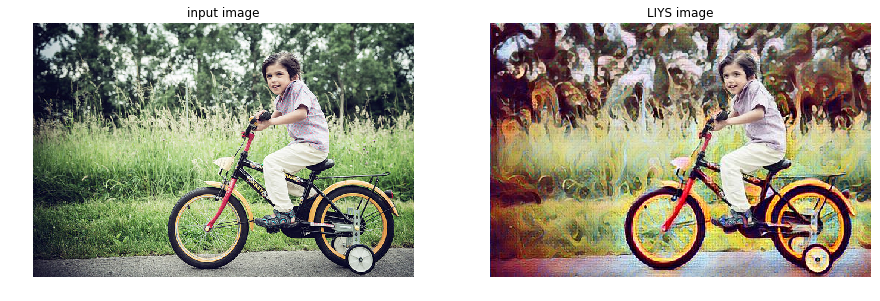

In [8]:
plt.figure(figsize=(15, 5))
grid_spec = gridspec.GridSpec(1, 2, width_ratios=[6, 6])

plt.subplot(grid_spec[0])
plt.imshow(image)
plt.axis('off')
plt.title('input image')

plt.subplot(grid_spec[1])
plt.imshow(rlt_img)
plt.axis('off')
plt.title('LIYS image')
